In [1]:

# @title
from IPython.display import display, HTML

display(HTML("""
<div style="
  margin: 18px 0 26px 0;
  padding: 24px 26px;
  border-radius: 18px;
  background: linear-gradient(135deg, #e8f0fb 0%, #d6e4f5 45%, #c7dbf1 100%);
  border: 1px solid #b6cceb;
  box-shadow: 0 10px 24px rgba(31,119,180,0.18);
  color: #1f77b4;
">

  <div style="text-align:center;">

    <div style="
      font-size: 50px;
      font-weight: 900;
      letter-spacing: -0.6px;
      line-height: 1.1;
      margin: 0;
      color: #1f77b4;
    ">
      Projet de Machine Learning
    </div>

    <div style="
      margin-top: 10px;
      font-size: 30px;
      color: #1e3a5f;
      line-height: 1.4;
      font-weight: 600;
    ">
      Thème 7 — Prévision des coûts médicaux (en $)
      <span style="
        display:inline-block;
        margin-left: 10px;
        padding: 4px 12px;
        border-radius: 999px;
        background: #1f77b4;
        color: #ffffff;
        font-weight: 700;
        font-size:18px;
        vertical-align: middle;
      ">
        Regression
      </span>
    </div>

    <div style="
      margin-top: 16px;
      display:flex;
      justify-content:center;
      gap:10px;
    ">
      <div style="height: 6px; width: 120px; background:#1f77b4; border-radius: 999px;"></div>
      <div style="height: 6px; width: 40px; background:#4fa3d1; border-radius: 999px;"></div>
      <div style="height: 6px; width: 14px; background:#9cc7e6; border-radius: 999px;"></div>
    </div>

    <div style="
      margin-top: 16px;
      display:inline-block;
      padding: 8px 14px;
      border-radius: 14px;
      background: rgba(255,255,255,0.7);
      border: 1px solid #b6cceb;
      font-size: 13px;
      color: #0b1f3a;
      font-weight: 700;
    ">
      Analyse exploratoire des données (EDA)
    </div>

  </div>
</div>
"""))

# @title
from IPython.display import display, HTML

display(HTML("""
<div style="
  margin: 10px 0;
  padding: 24px 26px;
  border-radius: 18px;
  background: linear-gradient(135deg, #e8f0fb 0%, #d6e4f5 45%, #c7dbf1 100%);
  border: 1px solid #b6cceb;
  box-shadow: 0 10px 24px rgba(31,119,180,0.12);
  font-family: sans-serif;
  color: #1e3a5f;
">
  
  <table style="width: 100%; border-collapse: collapse; border: none;">
    <tr>
      <td style="width: 50%; padding-bottom: 15px; vertical-align: top; text-align: left;">
        <span style="font-weight: 800; color: #1f77b4; font-size: 16px; text-transform: uppercase;">Rédigé par :</span>
      </td>
      <td style="width: 50%; padding-bottom: 15px; vertical-align: top; text-align: right;">
        <span style="font-weight: 800; color: #1f77b4; font-size: 16px; text-transform: uppercase;">Sous la supervision de :</span>
      </td>
    </tr>

    <tr>
      <td style="padding-bottom: 20px; vertical-align: top; line-height: 1.6;text-align: left;">
        <div style="font-weight: 600; font-size: 15px;">
          NGUEMFOUO NGOUMTSA Célina<br>
          Sarah-Laure FOGWOUNG DJOUFACK<br>
          RASAMOELINA Nihaviana Albert Paulinah<br>
          Cheick Oumar DIALLO<br>
          Ndeye Ramatoulaye Ndoye FALL
        </div>
      </td>
      <td style="padding-bottom: 20px; vertical-align: middle; text-align: right;">
        <div style="font-weight: 700; font-size: 17px">
          Madame Mously DIAW
        </div>
      </td>
    </tr>

    <tr>
      <td style="padding-top: 10px; font-style: italic; font-size: 14px; color: #506a85; text-align: left;">
        Élèves ingénieurs statisticiens économistes
      </td>
      <td style="padding-top: 10px; font-style: italic; font-size: 14px; color: #506a85; text-align: right;">
        Freelance Senior Data Scientist / ML Engineer
      </td>
    </tr>
  </table>

  <div style="margin-top: 25px; text-align: center;">
    <span style="
      display: inline-block;
      padding: 6px 20px;
      background: rgba(255,255,255,0.5);
      border-radius: 999px;
      font-weight: 900; 
      font-size: 16px;
      color: #1f77b4;
    ">
      Année académique 2025/2026
    </span>
  </div>
</div>
"""))


Rédigé par :,Sous la supervision de :
NGUEMFOUO NGOUMTSA Célina Sarah-Laure FOGWOUNG DJOUFACK RASAMOELINA Nihaviana Albert Paulinah Cheick Oumar DIALLO Ndeye Ramatoulaye Ndoye FALL,Madame Mously DIAW
Élèves ingénieurs statisticiens économistes,Freelance Senior Data Scientist / ML Engineer


<center>

# $\color{#1f77b4}{\mathbf{Installation\ des\ packages\ et\ paramètres\ globaux}}$

</center>


* **Importation des packages**

In [2]:
#!pip install missingno ydata-profiling yellowbrick shap
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import seaborn as sns
import ydata_profiling as prf
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy.stats import skew, mannwhitneyu
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

* **Configuration des paramètres**

In [3]:
Random_state = 42
Test_size = 0.2
f_eda = "outputs/eda"
os.makedirs(f_eda, exist_ok=True)

<center>

# $\color{#1f77b4}{\mathbf{I.\ Chargement\ et \ aperçu \ de \ la \ base}}$

</center>

* **Chargment de la base**

In [4]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
data = df

* **Aperçu de la base**

In [5]:
print("Shape:", df.shape)

Shape: (1338, 7)


In [6]:
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* **Valeurs manquantes et doublons**

In [8]:
display(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Il n'y a aucune valeur manquante dans notre base de données.

In [9]:
print("Nombre de doublon:", df.duplicated().sum())

Nombre de doublon: 1


In [10]:
# Supprimer le doublon
df = df.drop_duplicates().reset_index(drop=True)
print("Nombre de doublon:", df.duplicated().sum())

Nombre de doublon: 0


In [11]:
# enregistrer la base traitée
df.to_csv(os.path.join(f_eda, "data_final.csv"), index=False)

* **Statistiques descriptives**

In [12]:
stat_desc = pd.DataFrame(display(df.describe())).T
stat_desc.to_csv(os.path.join(f_eda, "stat_desc.csv"), index=False)
stat_desc

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


""


Notre base de données contient donc **1337** observations (après suppression du doublon) et **7** variables dont 3 variables catégorielles : *sex*, *smoker*, *region* et 4 variables numériques : *age*, *bmi* et *children* et la variable cible, *charges*.

<center>

# $\color{#1f77b4}{\mathbf{II. \ Analyse\ exploratoire \ des \ données }}$

</center>

<center>

## $\color{#1f77b4}{\mathbf{1. \ Analyse\ exploratoire \ univariée }}$

</center>

<center>

### $\color{#4fa3d1}{\mathbf{Variables \ numériques}}$

</center>

* **Variable âge**

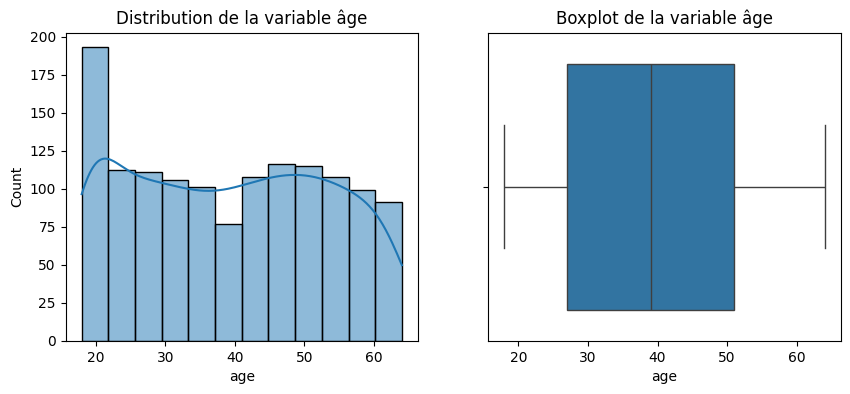

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df["age"], kde=True, ax=axes[0])
sns.boxplot(x=df["age"], ax=axes[1])
axes[0].set_title(f"Distribution de la variable âge")
axes[1].set_title(f"Boxplot de la variable âge")
plt.savefig(os.path.join(f_eda, "age.png"), dpi=150, bbox_inches="tight")
plt.show()

Le constat est que l’âge de la population consiérée est réparti de manière relativement homogène entre 18 et 64 ans.

* **Variable bmi (IMC)**

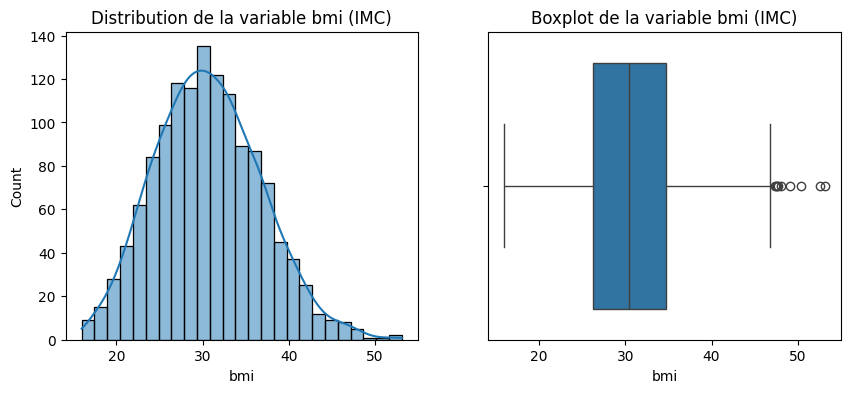

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df["bmi"], kde=True, ax=axes[0])
sns.boxplot(x=df["bmi"], ax=axes[1])
axes[0].set_title(f"Distribution de la variable bmi (IMC)")
axes[1].set_title(f"Boxplot de la variable bmi (IMC)")
plt.savefig(os.path.join(f_eda, "bmi.png"), dpi=150, bbox_inches="tight")
plt.show()

L'indice de masse corporelle (IMC ou BMI) de la opulation conidérée suit une distribution approximativement normale, centrée autour de 30, avec une légère asymétrie à droite.

* **Variable children**

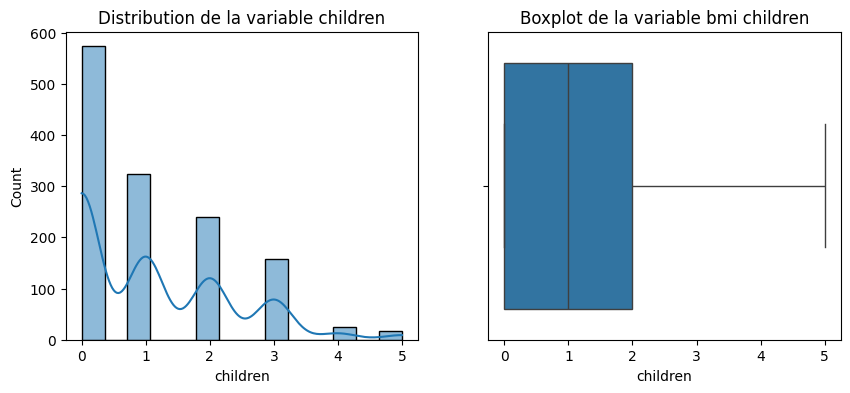

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df["children"], kde=True, ax=axes[0])
sns.boxplot(x=df["children"], ax=axes[1])
axes[0].set_title(f"Distribution de la variable children")
axes[1].set_title(f"Boxplot de la variable bmi children")
plt.savefig(os.path.join(f_eda, "children.png"), dpi=150, bbox_inches="tight")
plt.show()

La variable children est discrète et fortement concentrée sur les valeurs 0, 1 et 2, les valeurs supérieures étant rares.

* **Variable charges**

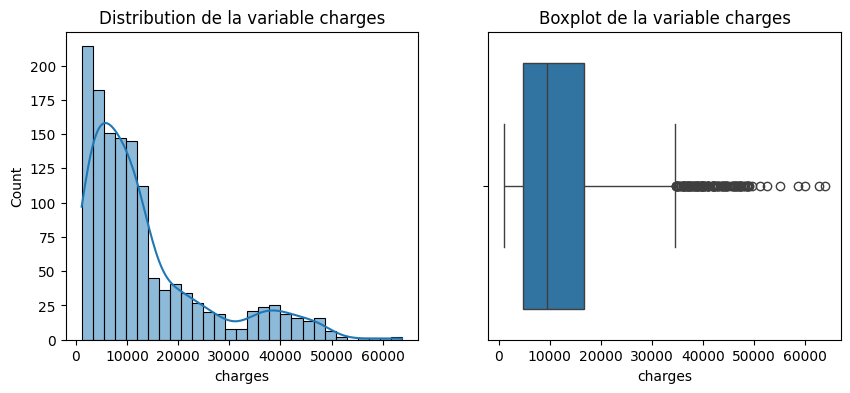

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df["charges"], kde=True, ax=axes[0])
sns.boxplot(x=df["charges"], ax=axes[1])
axes[0].set_title(f"Distribution de la variable charges")
axes[1].set_title(f"Boxplot de la variable charges")
plt.savefig(os.path.join(f_eda, "charges.png"), dpi=150, bbox_inches="tight")
plt.show()

La variable cible charges (represétant les coûts médicaux) présente une forte asymétrie à droite avec une dispersion élevée et des valeurs extrêmes importantes. Par ailleurs, nous constatons de nombreux outliers pour la variable cible charge.

In [17]:
skew_raw = skew(df["charges"])
skew_log = skew(np.log(df["charges"]))

print("Skewness charges:", skew_raw)
print("Skewness log(charges):", skew_log)


Skewness charges: 1.5136902413349014
Skewness log(charges): -0.08973781209745355


L’analyse de la skewness montre que la variable cible charges est fortement asymétrique à droite, tandis que sa transformation logarithmique permet d’obtenir une distribution quasi symétrique. Cette observation justifie l’évaluation de modèles entraînés sur la variable cible transformée, notamment dans le cadre de la régression linéaire.

<center>

### $\color{#4fa3d1}{\mathbf{Variables \ catégorielles}}$

</center>

* **Variable sexe**

In [18]:
freq = df['sex'].value_counts()
prop = df['sex'].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    "count": freq,
    "percentage (%)": prop.round(2)
})
display(summary)

,count,percentage (%)
sex,,
male,675,50.49
female,662,49.51


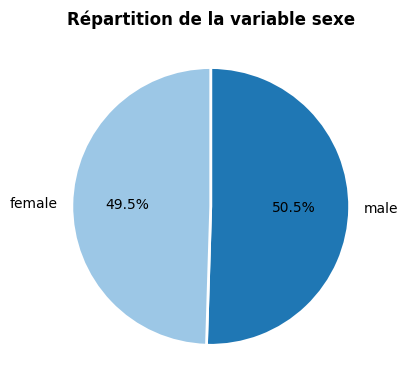

In [19]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
colors = ['#1f77b4', '#9cc7e6']
df['sex'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title("Répartition de la variable sexe", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(f_eda, "sexe.png"), dpi=150, bbox_inches="tight")
plt.show()

La variable sexe présente une répartition presque équilibrée entre les modalités female et male (respectivement 662 contre 676).

* **Variable smoker**

In [20]:
freq = df['smoker'].value_counts()
prop = df['smoker'].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    "count": freq,
    "percentage (%)": prop.round(2)
})
display(summary)

,count,percentage (%)
smoker,,
no,1063,79.51
yes,274,20.49


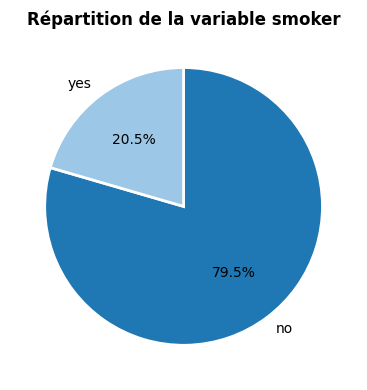

In [21]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
colors = ['#1f77b4', '#9cc7e6']
df['smoker'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title("Répartition de la variable smoker", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(f_eda, "smoker.png"), dpi=150, bbox_inches="tight")
plt.show()

La variable smoker est  déséquilibrée, avec  1064 individus non-fumeurs par rapport aux 274 fumeurs.

* **Variable région**

In [22]:
freq = df['region'].value_counts()
prop = df['region'].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    "count": freq,
    "percentage (%)": prop.round(2)
})
display(summary)

,count,percentage (%)
region,,
southeast,364,27.23
southwest,325,24.31
northwest,324,24.23
northeast,324,24.23


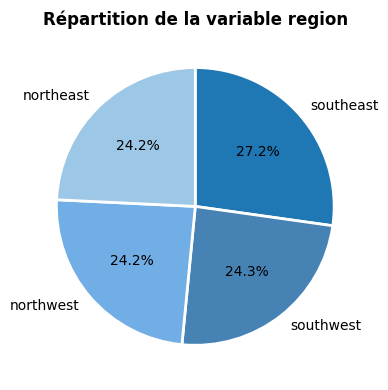

In [23]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
colors = ['#1f77b4', '#4682b4', '#72aee6', '#9cc7e6']
df['region'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title("Répartition de la variable region", fontweight='bold')
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(f_eda, "region.png"), dpi=150, bbox_inches="tight")
plt.show()

La variable region est répartie de manière relativement homogène entre les quatre régions, sans dominance marquée d’une catégorie particulière.

<center>

## $\color{#1f77b4}{\mathbf{2. \ Analyse\ exploratoire \ bivariée }}$

</center>

<center>

### $\color{#4fa3d1}{\mathbf{Relations\ entre\ les\ variables \ numériques\ et\ la\ variable\ cible}}$

</center>

* **Relation entre les variables âge et charges**

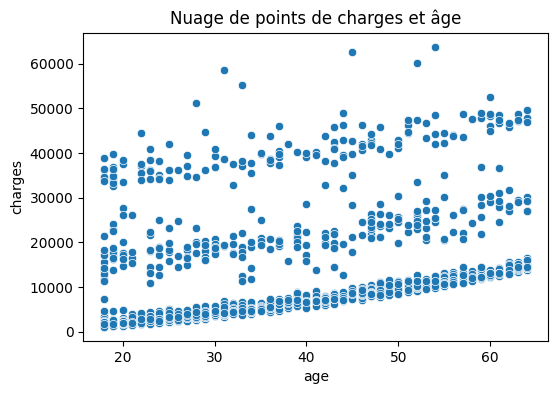

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Nuage de points de charges et âge")
plt.savefig(os.path.join(f_eda, "age_charges.png"), dpi=150, bbox_inches="tight")
plt.show()

On observe que les charges augmentent globalement avec l’âge, avec une dispersion croissante pour les âges élevés. cela indique une relation positive non strictement linéaire entre l'age et les charges.

* **Relation entre les variables bmi (IMC) et charges**

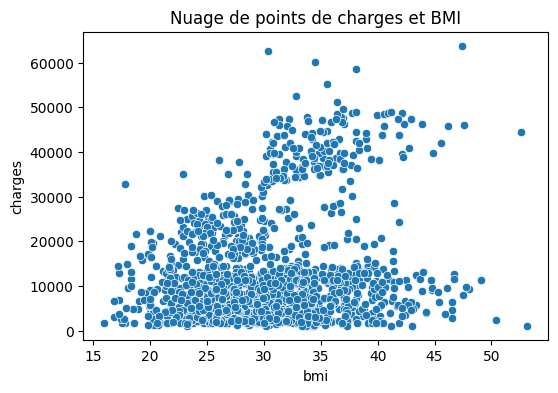

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("Nuage de points de charges et BMI")
plt.savefig(os.path.join(f_eda, "bmi_charges.png"), dpi=150, bbox_inches="tight")
plt.show()

La relation entre les charges et l'IMC est caractérisée par une forte dispersion, avec des valeurs élevées des charges observées principalement pour des IMC intermédiaires à élevés, sans relation linéaire simple.

* **Relation entre les variables children et charges**

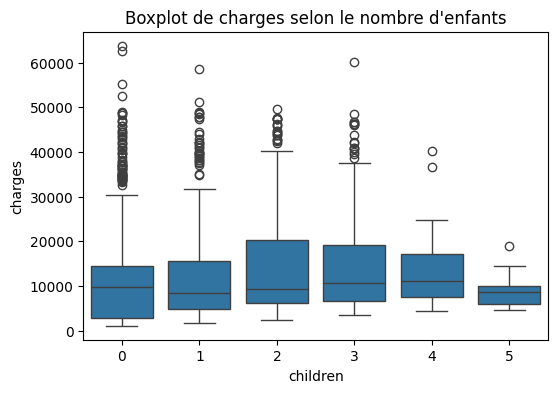

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x="children", y="charges", data=df)
plt.title("Boxplot de charges selon le nombre d'enfants")
plt.savefig(os.path.join(f_eda, "charges_children.png"), dpi=150, bbox_inches="tight")
plt.show()

L’analyse selon le nombre d’enfants montre des distributions de charges relativement proches entre les groupes, avec des médianes comparables et une variabilité importante au sein de chaque catégorie, ce qui suggère un effet limité du nombre d’enfants pris isolément sur le niveau des charges.

<center>

### $\color{#4fa3d1}{\mathbf{Relations\ entre\ les\ variables \ catégorielles\ et\ la\ variable\ cible}}$

</center>

* **Relation entre les variables région et charges**

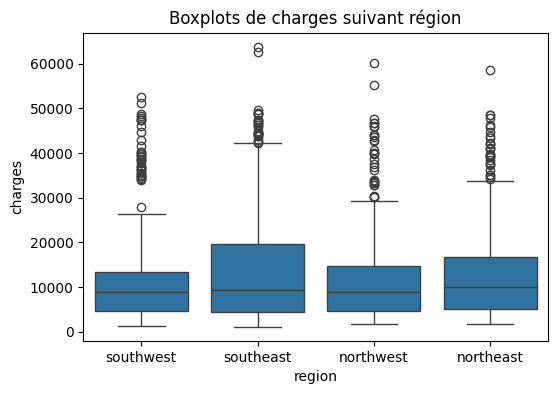

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Boxplots de charges suivant région")
plt.savefig(os.path.join(f_eda, "region_charges.png"), dpi=150, bbox_inches="tight")
plt.show()

Les distributions des charges selon la région présentent des médianes proches et des dispersions comparables entre les différentes régions, malgré la présence de valeurs extrêmes dans chaque groupe.

* **Relation entre les variables sexe et charges**

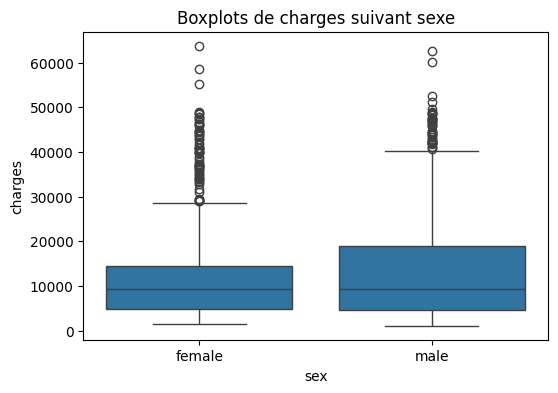

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Boxplots de charges suivant sexe")
plt.savefig(os.path.join(f_eda, "sexe_charges.png"), dpi=150, bbox_inches="tight")
plt.show()

La comparaison selon le sexe montre des distributions largement similaires entre les femmes et les hommes, avec des médianes proches et une variabilité importante dans les deux catégories.

* **Relation entre les variables smoker et charges**

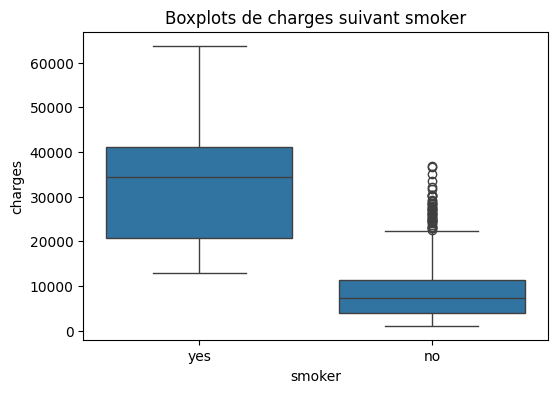

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Boxplots de charges suivant smoker")
plt.savefig(os.path.join(f_eda, "smoker_charges.png"), dpi=150, bbox_inches="tight")
plt.show()

Les charges varient fortement suivant les valeurs de la variable smoker, avec des niveaux nettement plus élevés et une dispersion beaucoup plus importante chez les fumeurs que chez les non-fumeurs.

In [30]:
# Analyse spécifique smoker vs charges pour voir comparer les distributions dans les groupes
df.groupby("smoker")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


**Test de Mann–Whitney**

In [31]:
charges_smoker = df[df["smoker"] == "yes"]["charges"]
charges_nonsmoker = df[df["smoker"] == "no"]["charges"]

mannwhitneyu(charges_smoker, charges_nonsmoker, alternative="two-sided")

MannwhitneyuResult(statistic=283859.0, pvalue=5.74701188239214e-130)

Ce test permet de voir s'il existe une différence statistiquement significative entre les charges des fumeurs et celles des non-fumeurs. Ce test est robuste étant donné que la distribution des charges est asymétrique.

Le résultat (p-value = 5.27e−130) conduit à rejeter l’hypothèse nulle d’égalité des distributions : les charges diffèrent significativement suivant que la personne soit fumeur ou non. Les statistiques descriptives précédentes montrent que les fumeurs ont des charges significativement plus élevées que les non fumeurs. De ce fait, cette variable apparait comme facteur discriminant de la variable cible et jouera un rôle central dans l’explication de la variabilité des charges.

<center>

### $\color{#4fa3d1}{\mathbf{Multicolinéarité}}$

</center>

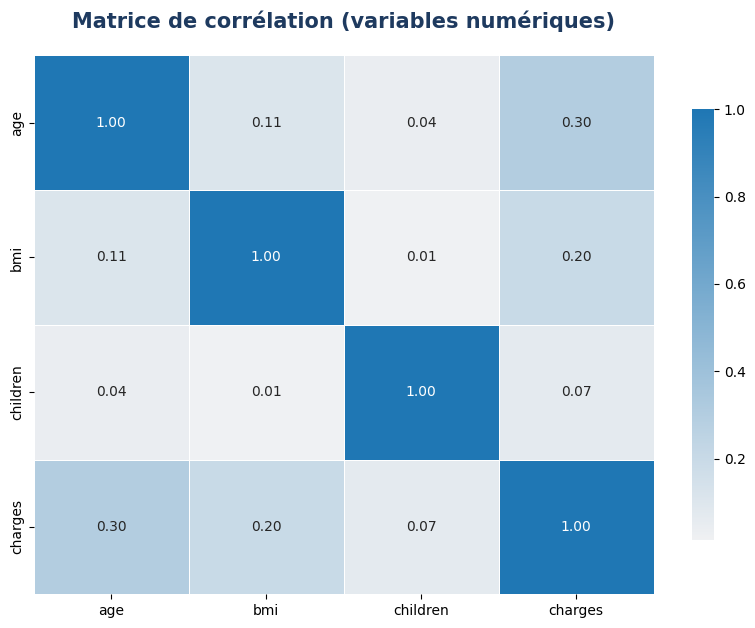

In [32]:
corr = df[["age", "bmi", "children", "charges"]].corr()
cmap_custom = sns.light_palette("#1f77b4", as_cmap=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap=cmap_custom, fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation (variables numériques)", fontsize=15, fontweight='bold', color='#1e3a5f', pad=20)
plt.savefig(os.path.join(f_eda, "corr.png"), dpi=150, bbox_inches="tight")
plt.show()

Les corrélations entre les variables explicatives numériques sont modérées et ne suggèrent pas de multicolinéarité forte susceptible d’affecter la modélisation.

L’analyse exploratoire met en évidence une forte asymétrie de la variable cible charges, ainsi qu’une hétéroscédasticité marquée. La variable smoker apparaît comme un facteur fortement discriminant des coûts d’assurance. Les autres variables montrent des relations plus modérées avec la cible. Aucune multicolinéarité significative n’est observée entre les variables numériques.

<center>

## $\color{#1f77b4}{\mathbf{3. \ Analyse\ de\ la\ variable \ cible\ :\ charges }}$

</center>

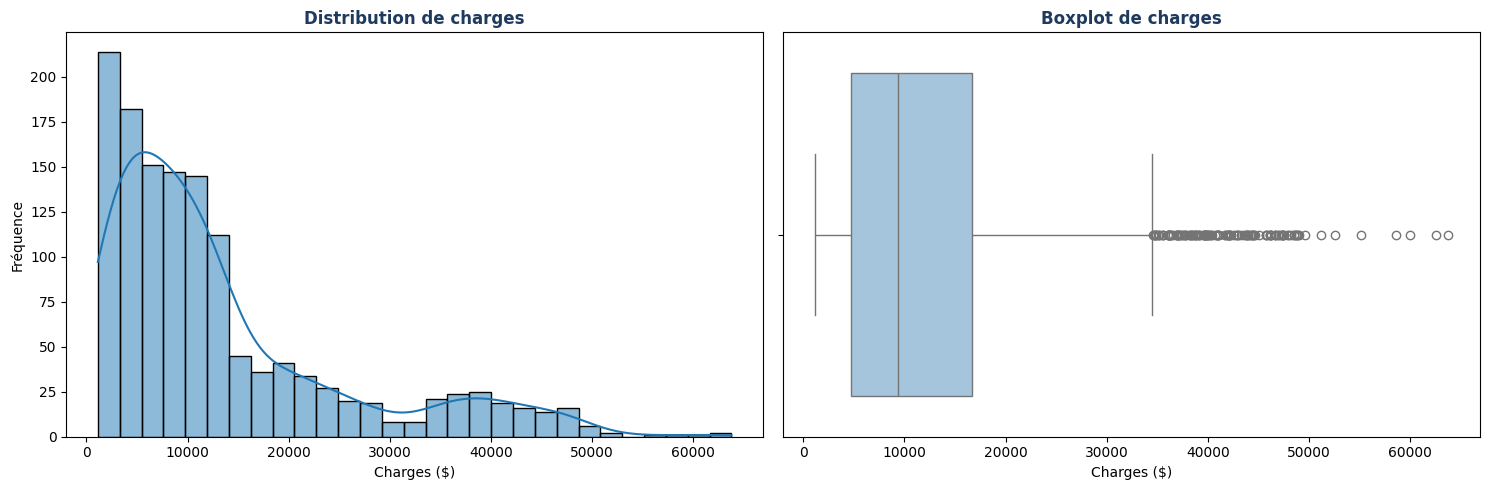

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["charges"], kde=True, ax=axes[0], color='#1f77b4')
axes[0].set_title("Distribution de charges", fontweight='bold', color='#1e3a5f')
axes[0].set_xlabel("Charges ($)")
axes[0].set_ylabel("Fréquence")
sns.boxplot(x=df["charges"], ax=axes[1], color='#9cc7e6')
axes[1].set_title("Boxplot de charges", fontweight='bold', color='#1e3a5f')
axes[1].set_xlabel("Charges ($)")
plt.tight_layout()
plt.savefig(os.path.join(f_eda, "charges_2.png"), dpi=150, bbox_inches="tight")
plt.show()

Ces graphiques montrent que la distribution de charges est fortement asymétrique à droite : la majorité des observations correspond à des charges relativement faibles, tandis qu’un petit nombre d’individus présente des coûts très élevés. Afin d'atténuer cette forte assymétrie, une transformation logarithmique est appliquée.

In [34]:
df['log_charges'] = np.log1p(df['charges'])

In [35]:
sk_charges = skew(df['charges'])
sk_log = skew(df['log_charges'])
print(f"Skewness charges: {sk_charges:.4f}")
print(f"Skewness log(charges): {sk_log:.4f}")

Skewness charges: 1.5137
Skewness log(charges): -0.0895


La baisse de l’asymétrie mesurée (skewness proche de zéro) indique que la transformation log peut fournit une cible plus favorable pour les modèles sensibles à ue forte assymétrie et aux outliers.

Voici les nouvelles distributions après transformation :

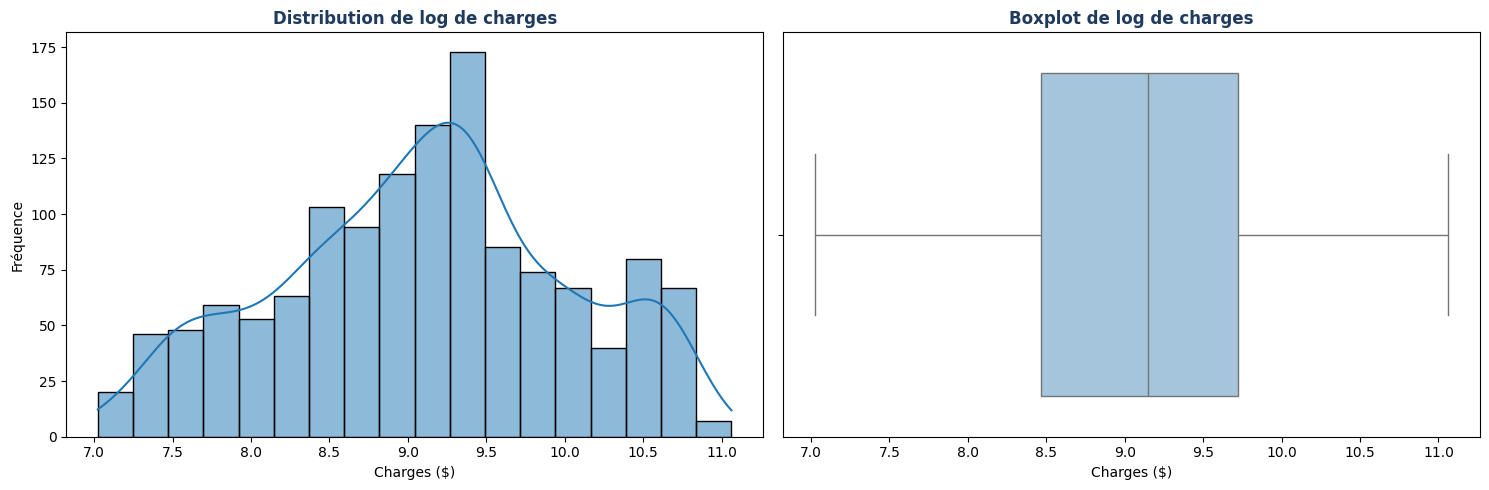

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["log_charges"], kde=True, ax=axes[0], color='#1f77b4')
axes[0].set_title("Distribution de log de charges", fontweight='bold', color='#1e3a5f')
axes[0].set_xlabel("Charges ($)")
axes[0].set_ylabel("Fréquence")
sns.boxplot(x=df["log_charges"], ax=axes[1], color='#9cc7e6')
axes[1].set_title("Boxplot de log de charges", fontweight='bold', color='#1e3a5f')
axes[1].set_xlabel("Charges ($)")
plt.tight_layout()
plt.savefig(os.path.join(f_eda, "log_charges.png"), dpi=150, bbox_inches="tight")
plt.show()

Les précédents constats et résultats conduisent à envisager deux cadres de modélisation complémentaires : une approche directe sur charges, et une approche sur log(1+charges), visant à améliorer les propriétés statistiques de la cible.

<center>

### $\color{#4fa3d1}{\mathbf{Rapport\ automatique}}$

</center>

Un rapport de profiling automatique est généré à l’aide de la librairie *ydata_profiling*. Ce rapport fournit une analyse détaillée des distributions, des corrélations, des valeurs extrêmes et des interactions potentielles entre variables, en complément de l’analyse exploratoire manuelle réalisée précédemment.

In [38]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()
df_pf=df.drop(["log_charges"], axis=1)

profile = ProfileReport(df_pf, title="Profiling Report")
profile.to_file(os.path.join(f_eda, "data_report.html"))  # Write the report to a file.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 218.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]